<a href="https://colab.research.google.com/github/Samarth-Kanodia/Car-Sales-Prediction-Linear-Regression-/blob/main/Car_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:
<ul>
  <li>
Customer Name
  </li><li>
Customer E-mail
  </li><li>
Country
  </li><li>
Gender
  </li><li>
Age
  </li><li>
Annual Salary
  </li><li>
Credit Card Debt
  </li><li>
Net Worth
  </li>
</ul>

The model should predict:
<ul>
  <li>
Car Purchase Amount
  </li>
</ul>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the csv file using pandas
df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'latin-1')

In [3]:
# displaying the first 5 values
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# displaying the size
df.size

4500

In [5]:
# displaying the shape
df.shape

(500, 9)

In [6]:
# displaying the column names
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [7]:
# displaying the data types of the columns
df.dtypes

,0
Customer Name,object
Customer e-mail,object
Country,object
Gender,int64
Age,float64
Annual Salary,float64
Credit Card Debt,float64
Net Worth,float64
Car Purchase Amount,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [10]:
# checking for null values
df.isnull().sum()

,0
Customer Name,0
Customer e-mail,0
Country,0
Gender,0
Age,0
Annual Salary,0
Credit Card Debt,0
Net Worth,0
Car Purchase Amount,0


In [11]:
# checking unique values
df.nunique()

,0
Customer Name,498
Customer e-mail,500
Country,211
Gender,2
Age,500
Annual Salary,500
Credit Card Debt,500
Net Worth,500
Car Purchase Amount,500


##Exploratory Data Analysis

###Univariate Analysis

<Axes: ylabel='count'>

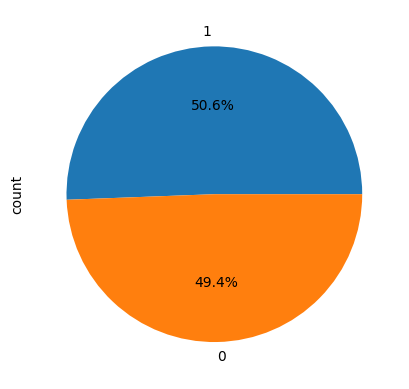

In [12]:
# categorical
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

The proportion of males and females is almost same in the given dataset

Text(0.5, 1.0, 'Net Worth')

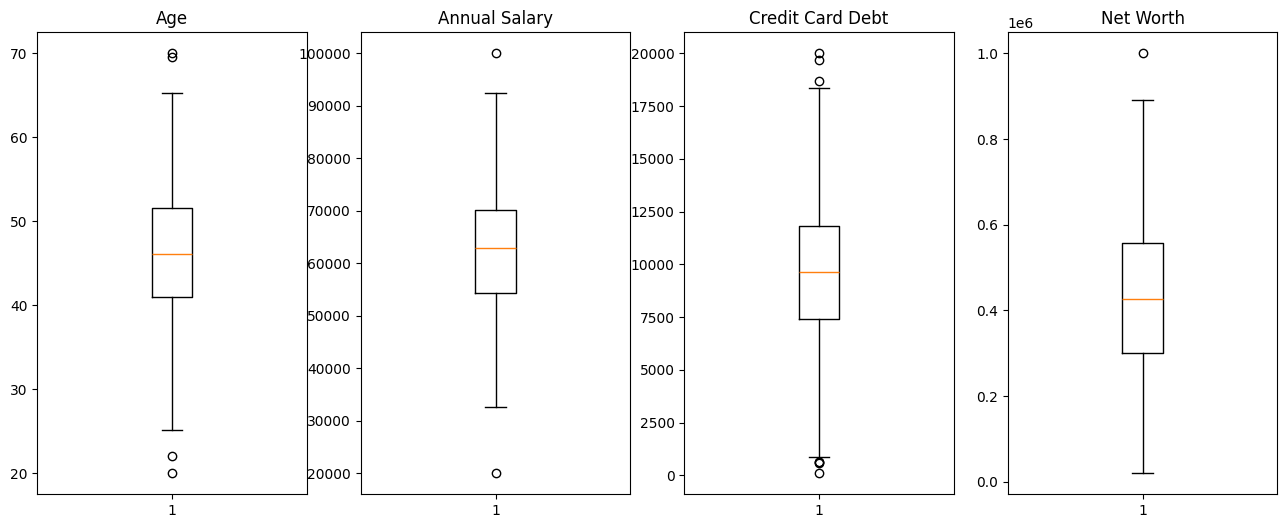

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize = (16, 6))

# Plot each boxplot
axes[0].boxplot(df['Age'])
axes[0].set_title('Age')

axes[1].boxplot(df['Annual Salary'])
axes[1].set_title('Annual Salary')

axes[2].boxplot(df['Credit Card Debt'])
axes[2].set_title('Credit Card Debt')

axes[3].boxplot(df['Net Worth'])
axes[3].set_title('Net Worth')

The above boxplots show the outliers

<ipython-input-14-e5127694e21d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], ax = axes[0], shade = True, color = "blue")
<ipython-input-14-e5127694e21d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Annual Salary'], ax = axes[1], shade = True, color = "green")
<ipython-input-14-e5127694e21d>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Credit Card Debt'], ax = axes[2], shade = True, color = "orange")
<ipython-input-14-e5127694e21d>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

 

Text(0.5, 1.0, 'Net Worth')

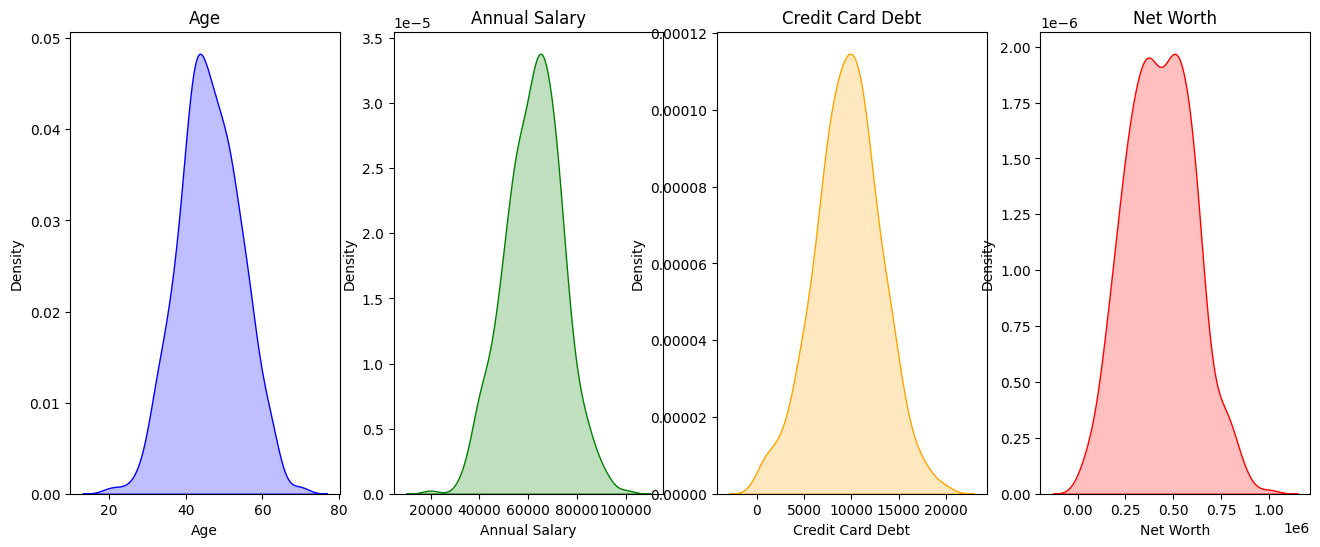

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize = (16, 6))

# Plot each boxplot
sns.kdeplot(df['Age'], ax = axes[0], shade = True, color = "blue")
axes[0].set_title('Age')

sns.kdeplot(df['Annual Salary'], ax = axes[1], shade = True, color = "green")
axes[1].set_title('Annual Salary')

sns.kdeplot(df['Credit Card Debt'], ax = axes[2], shade = True, color = "orange")
axes[2].set_title('Credit Card Debt')

sns.kdeplot(df['Net Worth'], ax = axes[3], shade = True, color = "red")
axes[3].set_title('Net Worth')

The above KDEplots show that the distributions are almost normal

###Bivariate Analysis

<Axes: xlabel='Age', ylabel='Car Purchase Amount'>

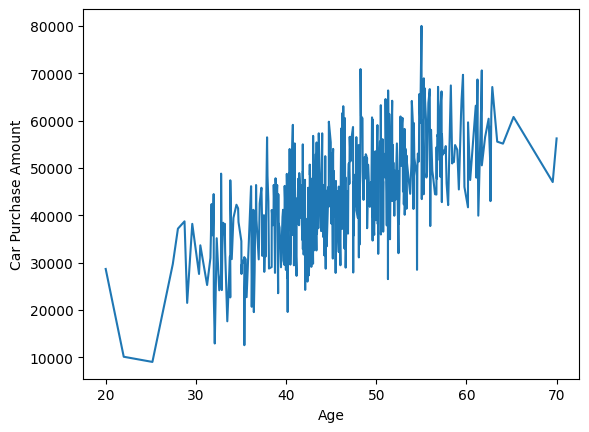

In [15]:
# numerical-numerical
import seaborn as sns
sns.lineplot(data = df, x = "Age", y = "Car Purchase Amount")

Despite the high fluctuations in Car Purchase Amount in every age interval, there is an overall increase in the former as the age increases

<Axes: xlabel='Annual Salary', ylabel='Car Purchase Amount'>

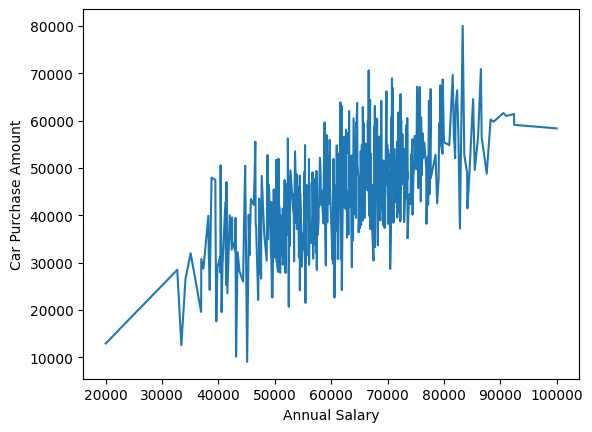

In [16]:
sns.lineplot(data = df, x = "Annual Salary", y = "Car Purchase Amount")

Similar to the trend shown by Age vs Car Purchase Amount, there is a positive correlation between Annual Salary and Car Purchase Amount

<Axes: xlabel='Credit Card Debt', ylabel='Car Purchase Amount'>

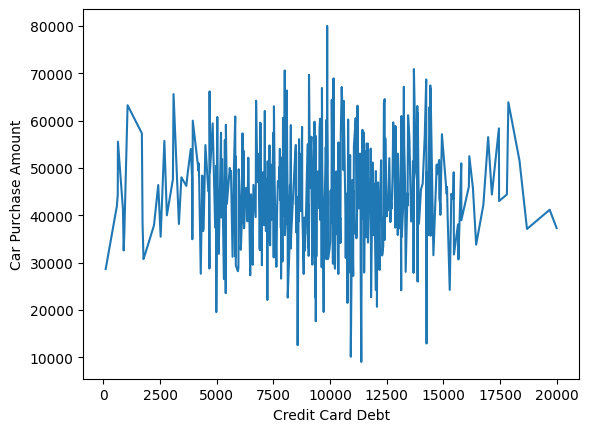

In [17]:
sns.lineplot(data = df, x = "Credit Card Debt", y = "Car Purchase Amount")

<Axes: xlabel='Net Worth', ylabel='Car Purchase Amount'>

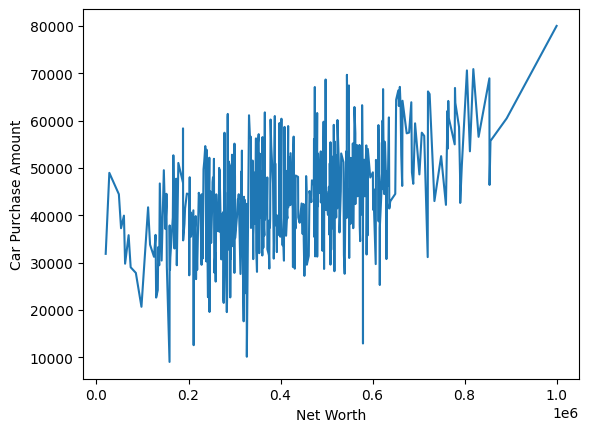

In [18]:
sns.lineplot(data = df, x = "Net Worth", y = "Car Purchase Amount")

Similar to the trend shown by Age vs Car Purchase Amount, there is a positive correlation between Net Worth and Car Purchase Amount

In [19]:
df_num = pd.DataFrame(df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']])
cor = df_num.corr()
print(cor)

                    Gender       Age  Annual Salary  Credit Card Debt  \
Gender            1.000000 -0.064481      -0.036499          0.024193   
Age              -0.064481  1.000000       0.000130          0.034721   
Annual Salary    -0.036499  0.000130       1.000000          0.049599   
Credit Card Debt  0.024193  0.034721       0.049599          1.000000   
Net Worth        -0.008395  0.020356       0.014767         -0.049378   

                  Net Worth  
Gender            -0.008395  
Age                0.020356  
Annual Salary      0.014767  
Credit Card Debt  -0.049378  
Net Worth          1.000000  


<Axes: >

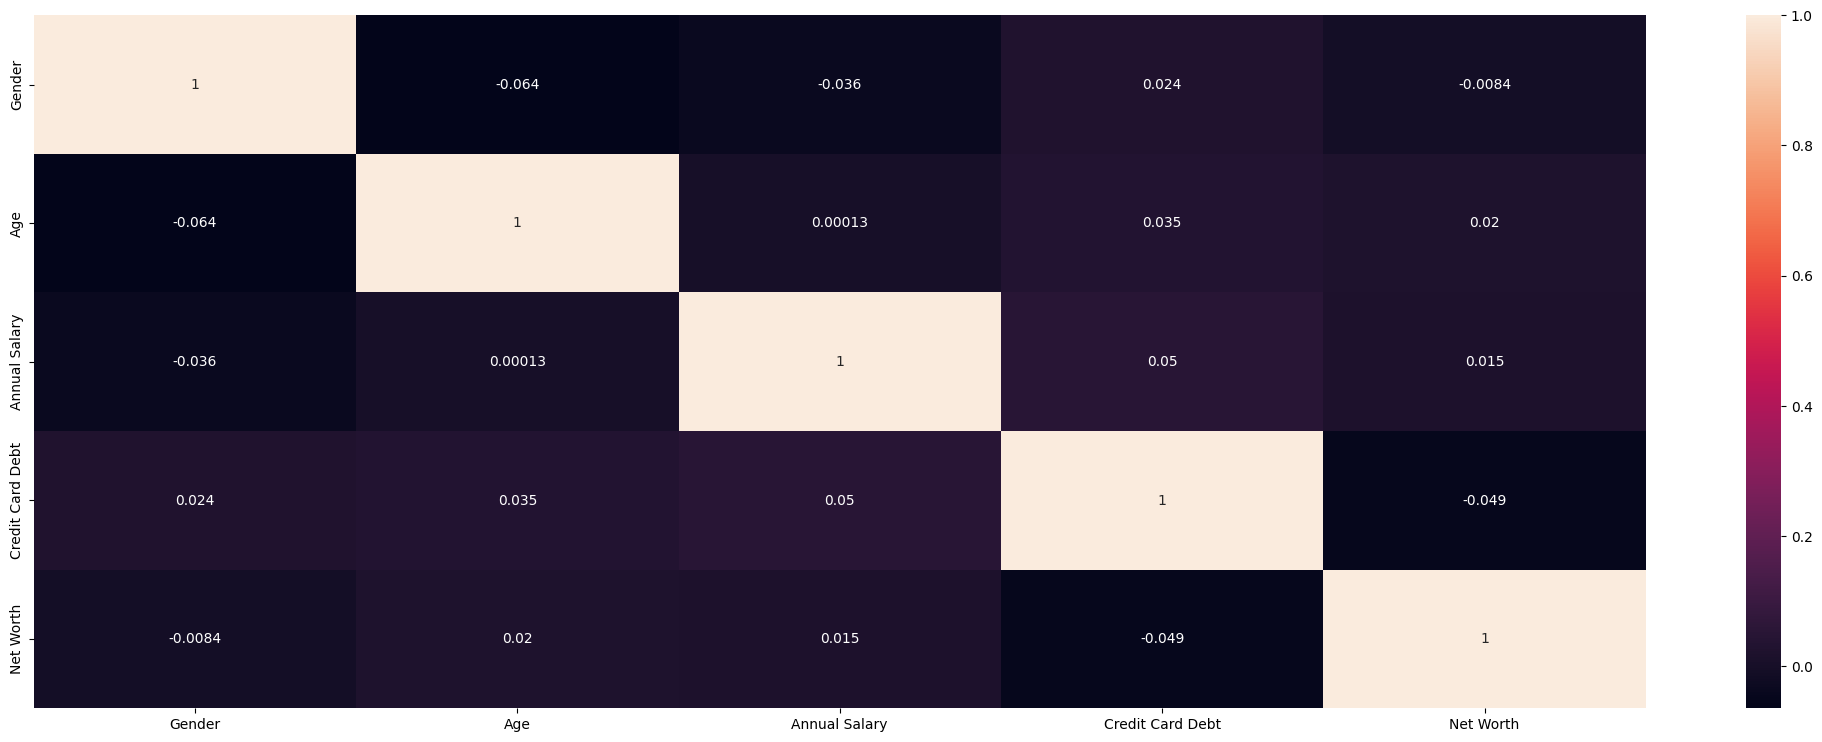

In [20]:
plt.figure(figsize = (26, 9))
sns.heatmap(cor, annot = True)

The above correlation heatmap shows that the independent variables have no significant multicollinearity

In [21]:
# separating the independent and target variables
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y = df['Car Purchase Amount']

In [22]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
sc_y = StandardScaler()

y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc_y.transform(y_test.values.reshape(-1, 1))

In [25]:
# importing and building Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [26]:
# fitting the model on training dataset
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
residuals = y_train - regressor.predict(X_train)

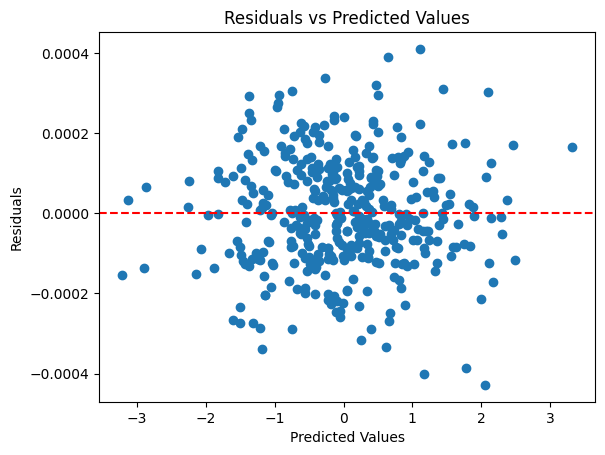

In [28]:
# scatter plot of predicted values vs residuals
plt.scatter(regressor.predict(X_train), residuals)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

The random scattering of the residual points around the horizontal line (y = 0) shows Linearity (curved pattern indicates non-linearity)

Constant spread of the residuals shows Homoscedasticity (funnel of increasing/ decreasing trend indicates heteroscedasticity)

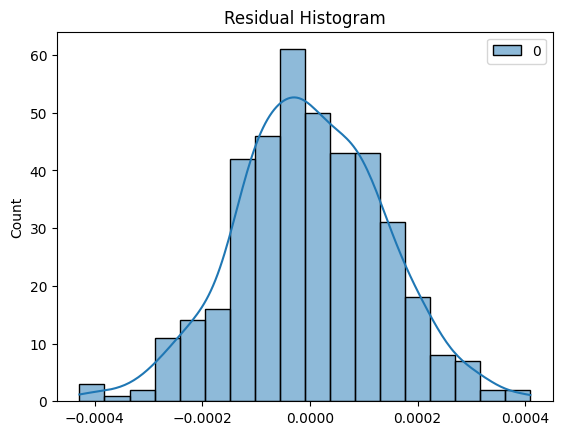

In [29]:
# histogram of residuals
sns.histplot(residuals, kde = True)
plt.title('Residual Histogram')
plt.show()

The almost normal distribution of the residuals shows Multivariate Normality

####Proving the assumptions of Linearity, Homoscedasticity, Multivariate Normality and Lack of Multicollinearity allows us to implement Linear Regression on the given dataset

In [30]:
# making prediction on the test dataset
y_pred_reg = regressor.predict(X_test)

In [31]:
# calculating Root-Mean-Square Error to evaluate performance
import math
from sklearn.metrics import mean_squared_error
rmse_reg = math.sqrt(mean_squared_error(y_test, y_pred_reg))
print(f"Root Mean Square Error is: ", rmse_reg)

Root Mean Square Error is:  0.0001335390979674459


In [32]:
y_pred_reg = pd.DataFrame(y_pred_reg)
y_test = pd.DataFrame(y_test)
compare = pd.concat([y_test, y_pred_reg], axis = 1)
compare.columns = ['Actual', 'Predicted']
compare

,Actual,Predicted
0,0.197167,0.197330
1,0.102685,0.102826
2,1.765560,1.765719
3,-1.117338,-1.117239
4,1.523929,1.523904
...,...,...
95,0.473666,0.473886
96,0.112691,0.112770
97,0.647030,0.646913
98,-0.004410,-0.004464


In [33]:
# building ANN Regression model
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [34]:
# adding 3 layers with 6, 6 and 1 neurons/units respectively
ann.add(tf.keras.layers.Dense(units = 25, activation = 'relu', input_dim = 5))
ann.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compiling the ann
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# fitting the ann to training dataset
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8032
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6259
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3900  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2593 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1575  
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0931  
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0586 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0419 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0298  
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256  
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [38]:
# making prediction on the test dataset
y_pred_ann = ann.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [39]:
# calculating Root-Mean-Square Error to evaluate performance
rmse_ann = math.sqrt(mean_squared_error(y_test, y_pred_ann))
print(rmse_ann)

0.04448207066890888


##Conclusion:
<ul>
  <li>
    Car Purchase Amount was predicted successfully through Linear Regression after proving the assumptions of:
      <ul type = 2>
        <li>
          Linearity
        </li>
        <li>
          Homoscedasticity
        </li>
        <li>
          Multivariate Normality
        </li>
        <li>
          Lack of Multi-collinearity
        </li>
      </ul>
  
  </li>
  <li>
    ANN Regressor gave comparatively greater RMSE than the Linear Regressor because of the dataset size.
  </li>

<img src = "https://www.researchgate.net/profile/Iqbal-Sarker/publication/353986944/figure/fig3/AS:11431281092664269@1666925194812/An-illustration-of-the-performance-comparison-between-deep-learning-DL-and-other.png" width = "300px" height = "175px">

</ul>